In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

# Lab2-1. PyTorch Tensor

### tensor indexing (index가 0부터 시작한다는 점에 유의할 것)

In [23]:
x = torch.tensor(
    [[1.0, 1.0, 1.0, 1.0],
     [2.0, 2.0, 2.0, 2.0],
     [3.0, 3.0, 3.0, 3.0]]
)  # x.shape: [3, 4]
print(x)
print(x[0])
print(x[0, :])
print(x[:, 3])
print(x[2, 3])

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 2., 3.])
tensor(3.)


### unsqueeze

In [35]:
x = torch.tensor([1.0, 2.0, 3.0])
print(x.shape)
x = x.unsqueeze(1)
print(x.shape)

torch.Size([3])
torch.Size([3, 1])


### sampling from a normal distribution

In [46]:
x = torch.randn(3)
print(x)

tensor([-0.2339,  1.1038,  1.1680])


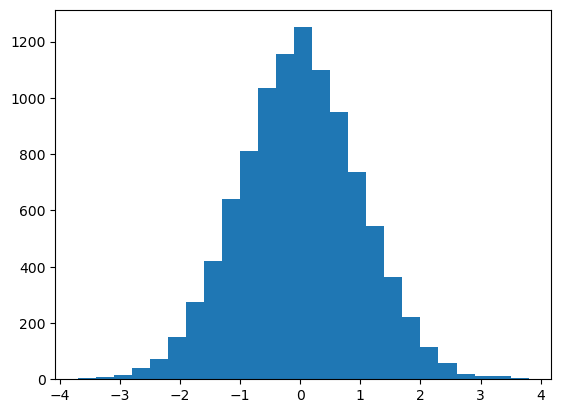

In [47]:
x = torch.randn(10000)
plt.hist(x, bins=25)  # x를 histogram 그기기 (막대바 개수 = 25)
plt.show()

### Element-wise addition, multiplication

In [24]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([2.0, 3.0, 4.0])
print("add:", x + y)
print("mul:", x * y)

add: tensor([3., 5., 7.])
mul: tensor([ 2.,  6., 12.])


### vector dot-product (https://pytorch.org/docs/main/generated/torch.matmul.html)

In [25]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([2.0, 3.0, 4.0])
print( x @ y)
print((x * y).sum())

tensor(20.)
tensor(20.)


### matrix multiplication

In [26]:
x = torch.tensor(
    [[1.0, 1.0, 1.0, 1.0],
     [2.0, 2.0, 2.0, 2.0],
     [3.0, 3.0, 3.0, 3.0]]
)            # x.shape: [3, 4]
y = torch.tensor(
    [[1.0, 2.0],
     [1.0, 2.0],
     [1.0, 2.0],
     [1.0, 2.0]]
)           # y.shape: [4, 2]
z = x @ y   # z.shape: [3, 2]
print("x.shape:", x.shape)
print("y.shape:", y.shape)
print("z.shape:", z.shape)
print(z)

x.shape: torch.Size([3, 4])
y.shape: torch.Size([4, 2])
z.shape: torch.Size([3, 2])
tensor([[ 4.,  8.],
        [ 8., 16.],
        [12., 24.]])


# Lab2-2. Perceptron (AND Gate)

In [30]:
dataset = [
    {'x': torch.tensor([0.0, 0.0]), 'y': torch.tensor([0.0])},
    {'x': torch.tensor([0.0, 1.0]), 'y': torch.tensor([0.0])},
    {'x': torch.tensor([1.0, 0.0]), 'y': torch.tensor([0.0])},
    {'x': torch.tensor([1.0, 1.0]), 'y': torch.tensor([1.0])},
]

weight = torch.tensor([5.0, 5.0])  # weight.shape = [2]
bias = torch.tensor([-7.5])        # bias.shape = [1]

print(f"weight: {weight.tolist()}, bias: {bias.tolist()}")
for data in dataset:
    x = data['x']    # x.shape = [2]
    y = data['y']    # y.shape = [1]
    y_hat = torch.sigmoid(weight @ x + bias)    # @: dot product 
    print(f"입력: {x.tolist()}, 출력: {y_hat.item():.4f}, 정답: {y.item()}")

weight: [5.0, 5.0], bias: [-7.5]
입력: [0.0, 0.0], 출력: 0.0006, 정답: 0.0
입력: [0.0, 1.0], 출력: 0.0759, 정답: 0.0
입력: [1.0, 0.0], 출력: 0.0759, 정답: 0.0
입력: [1.0, 1.0], 출력: 0.9241, 정답: 1.0


# Lab2-3. Training a Perceptron (AND Gate)

In [65]:
# Prepare training data
x = torch.tensor([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]).cuda()    # x.shape: [4, 2]
y = torch.tensor([0.0, 0.0, 0.0, 1.0]).cuda() # y.shape: [4]

# Initialize parameters
weight = torch.randn(2).cuda()  # weight.shape = [2]
bias = torch.randn(1).cuda()    # bias.shape = [1]

print("===== Right after initialization =====")
print(f"weight: {weight.tolist()}, bias: {bias.tolist()}")
for i in range(4):
    x_i = x[i]    # x_i.shape = [2]
    y_i = y[i]    # y_i.shape = [1]
    y_hat = torch.sigmoid(weight @ x_i + bias)    # @: dot product 
    print(f"입력: {x_i.tolist()}, 출력: {y_hat.item():.4f}, 정답: {y_i.item()}")

===== Right after initialization =====
weight: [-0.399760901927948, -0.607212245464325], bias: [0.1611652374267578]
입력: [0.0, 0.0], 출력: 0.5402, 정답: 0.0
입력: [0.0, 1.0], 출력: 0.3903, 정답: 0.0
입력: [1.0, 0.0], 출력: 0.4406, 정답: 0.0
입력: [1.0, 1.0], 출력: 0.3003, 정답: 1.0


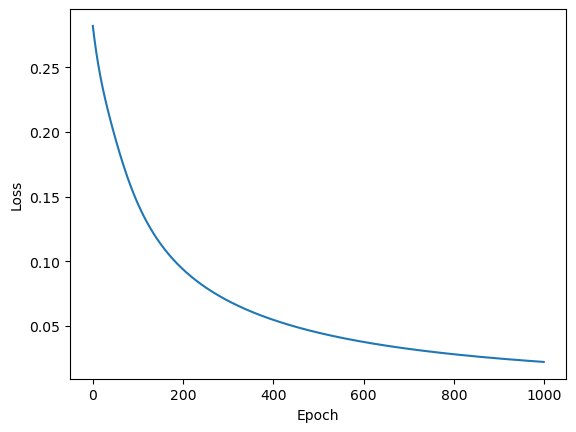

===== After training =====
weight: [3.078881025314331, 3.078817367553711], bias: [-4.73382043838501]
입력: [0.0, 0.0], 출력: 0.0087, 정답: 0.0
입력: [0.0, 1.0], 출력: 0.1604, 정답: 0.0
입력: [1.0, 0.0], 출력: 0.1604, 정답: 0.0
입력: [1.0, 1.0], 출력: 0.8059, 정답: 1.0


In [66]:
# Train
TOTAL_EPOCH = 1000
LR = 0.3

losses = []
for epoch in range(TOTAL_EPOCH):
    # forward propagation
    h = (x * weight).sum(dim=1) + bias  # h.shape: [4]
    y_hat = torch.sigmoid(h)            # y_hat.shape: [4]
    loss = (y_hat - y).square().mean()  # loss.shape: [1]
    losses.append(loss.item())

    # backpropagation (using chain rule)
    dL_dyhat = 2 * (y_hat - y) / 4          # shape: [4]
    dL_dh = dL_dyhat * y_hat * (1 - y_hat)  # shape: [4]
    dL_dbias = dL_dh.sum()                  # shape: [1]
    dL_dweight = (dL_dh.unsqueeze(1) * x).sum(dim=0)  # shape: [2]

    # gradient descent
    weight = weight - LR * dL_dweight
    bias = bias - LR * dL_dbias
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Validate
print("===== After training =====")
print(f"weight: {weight.tolist()}, bias: {bias.tolist()}")
for i in range(4):
    x_i = x[i]    # x_i.shape = [2]
    y_i = y[i]    # y_i.shape = [1]
    y_hat = torch.sigmoid(weight @ x_i + bias)    # @: dot product 
    print(f"입력: {x_i.tolist()}, 출력: {y_hat.item():.4f}, 정답: {y_i.item()}")

# Lab2-4. Training a Perceptron (AND Gate) (Without manual backpropagation)

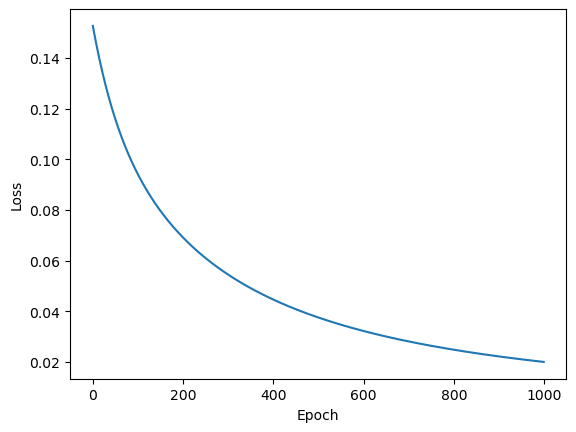

===== After training =====
weight: [3.207010269165039, 3.207648992538452], bias: [-4.9242753982543945]
입력: [0.0, 0.0], 출력: 0.0072, 정답: 0.0
입력: [0.0, 1.0], 출력: 0.1523, 정답: 0.0
입력: [1.0, 0.0], 출력: 0.1522, 정답: 0.0
입력: [1.0, 1.0], 출력: 0.8161, 정답: 1.0


In [68]:
# Prepare training data
x = torch.tensor([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]).cuda()
y = torch.tensor([0.0, 0.0, 0.0, 1.0]).cuda()

# Initialize parameters
weight = nn.Parameter(torch.randn(2).cuda())
bias = nn.Parameter(torch.randn(1).cuda())

# Train
TOTAL_EPOCH = 1000
LR = 0.3
losses = []
for _ in range(TOTAL_EPOCH):
    weight.grad = None
    bias.grad = None

    # forward propagation
    y_hat = torch.sigmoid((x * weight).sum(dim=1) + bias)
    loss = F.mse_loss(y_hat, y)
    losses.append(loss.item())

    # PyTorch's automatic backpropagation
    loss.backward()

    # gradient descent
    weight.data = weight.data - LR * weight.grad
    bias.data = bias.data - LR * bias.grad
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Validate
print("===== After training =====")
print(f"weight: {weight.tolist()}, bias: {bias.tolist()}")
for i in range(4):
    x_i = x[i]    # x_i.shape = [2]
    y_i = y[i]    # y_i.shape = [1]
    y_hat = torch.sigmoid(weight @ x_i + bias)    # @: dot product 
    print(f"입력: {x_i.tolist()}, 출력: {y_hat.item():.4f}, 정답: {y_i.item()}")

# Lab2-5. Training a Perceptron (AND Gate) (Without manual gradient descent)

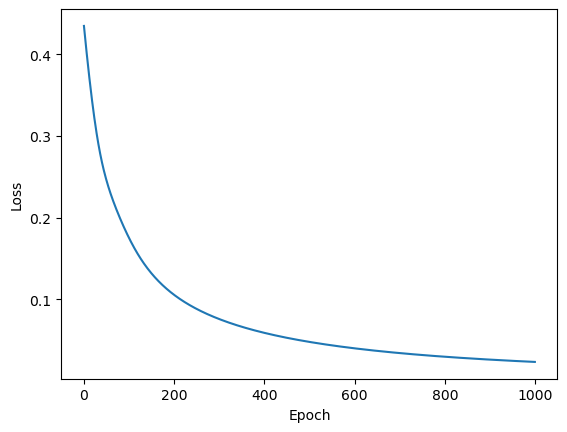

===== After training =====
weight: [3.0378365516662598, 3.0382144451141357], bias: [-4.673347473144531]
입력: [0.0, 0.0], 출력: 0.0093, 정답: 0.0
입력: [0.0, 1.0], 출력: 0.1631, 정답: 0.0
입력: [1.0, 0.0], 출력: 0.1631, 정답: 0.0
입력: [1.0, 1.0], 출력: 0.8026, 정답: 1.0


In [70]:
# Prepare training data
x = torch.tensor([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]).cuda()
y = torch.tensor([0.0, 0.0, 0.0, 1.0]).cuda()

# Initialize parameters
weight = nn.Parameter(torch.randn(2).cuda())
bias = nn.Parameter(torch.randn(1).cuda())

# Initialize an optimizer (we use a stochastic gradient descent optimizer)
parameters = [weight, bias]
optimizer = torch.optim.SGD(parameters, lr=LR)

# Train
TOTAL_EPOCH = 1000
LR = 0.3
losses = []
for _ in range(TOTAL_EPOCH):
    optimizer.zero_grad()

    # forward propagation
    y_hat = torch.sigmoid((x * weight).sum(dim=1) + bias)
    loss = F.mse_loss(y_hat, y)
    losses.append(loss.item())

    # PyTorch's automatic backpropagation
    loss.backward()

    # gradient descent
    optimizer.step()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Validate
print("===== After training =====")
print(f"weight: {weight.tolist()}, bias: {bias.tolist()}")
for i in range(4):
    x_i = x[i]    # x_i.shape = [2]
    y_i = y[i]    # y_i.shape = [1]
    y_hat = torch.sigmoid(weight @ x_i + bias)    # @: dot product 
    print(f"입력: {x_i.tolist()}, 출력: {y_hat.item():.4f}, 정답: {y_i.item()}")

# Lab2.6 Deep Neural Network (Regression)

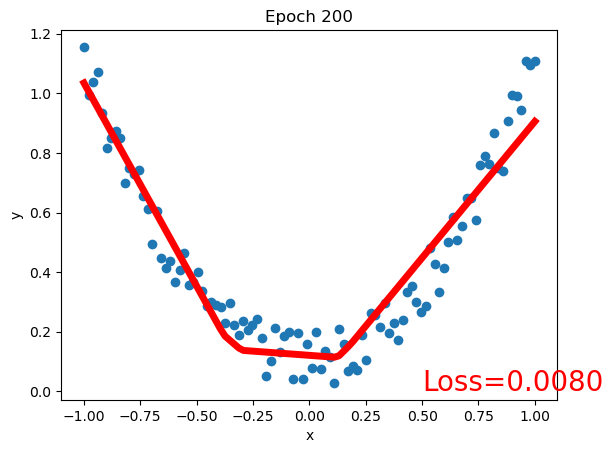

In [4]:
from IPython.display import clear_output

# Prepare data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).cuda()  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()).cuda()                 # noisy y data (tensor), shape=(100, 1)

# Define a network class
class DNN(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

# Create a network
net = DNN(n_feature=1, n_hidden=10, n_output=1)
net.cuda()
print(net)

# Define an optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

for epoch in range(1, 201):
    optimizer.zero_grad()
    prediction = net(x)    # forward propagation
    loss = (prediction - y).square().mean() # mean squared error loss
    loss.backward()         # backpropagation
    optimizer.step()        # apply gradients

    if epoch % 5 == 0:
        # plot and show learning process
        clear_output(wait=True)
        plt.cla()
        plt.title(f"Epoch {epoch}")
        plt.scatter(x.cpu().numpy(), y.cpu().numpy())
        plt.plot(x.cpu().numpy(), prediction.data.cpu().numpy(), 'r-', lw=5)
        plt.text(0.5, 0, f'Loss={loss.item():.4f}', fontdict={'size': 20, 'color':  'red'})
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()